In [1]:
import matplotlib.pyplot as plt
from modules.meta import * 
from modules.basis import *
from modules.genMatrices import *

In [ ]:
import numpy as np
order = 2
dimMapping = { 1:"1", order:"_SWE_DG_ORDER" , order+1:"_SWE_DG_ORDER+1" , (order+1)*(order+2)/2 : "_SWE_DG_DOFS"}
gllNodes  = getGLLNodes(order)
timeBasis = getLagrangeBasis(gllNodes)


dimMapping = { 1                      : str(1), 
               2                      : str(2), 
              order                   : str(order) ,
              order+1                 : str(order+1) ,
              (order+1)*(order+2)/2   : str((order+1)*(order+2)/2),
              (order+1)*(order+2)/2+1 : str((order+1)*(order+2)/2+1),
              (order+1)*(order+2)     : str((order+1)*(order+2)),
              (2*order+1)             : str((2*order+1)),
              (2*order+1)**2          : str((2*order+1)**2)}


alphaNodes = getAlphaNodes(order)
basis2D = vandermonde_2D(order,alphaNodes)
printBasisFunctions(basis2D,order)


In [ ]:
t_m = generate_t_m(timeBasis)
t_m_1 = t_m[1:,:]

t_k_t        = generate_t_k(timeBasis)
t_k_t_10     = matrix(t_k_t[1:,:1])
t_k_t_11     = matrix(t_k_t[1:,1:])
t_k_t_11_inv = matrix(np.linalg.inv(t_k_t_11))

t_a = generate_t_a(timeBasis)

printMatrix(t_m_1,"t_m_1",order)
printMatrix(t_a  ,"t_a"  ,order)
#printMatrix(t_k_t,"t_k_t",order)
printMatrix(t_k_t_10    ,"t_k_t_10",order)
printMatrix(t_k_t_11_inv,"t_k_t_11_inv",order)

In [ ]:
#order = 3
#dimMapping = { 1                    : "1", 
#              order                 : "_SWE_DG_ORDER" ,
#              order+1               : "_SWE_DG_ORDER+1" ,
#              (order+1)*(order+2)/2 : "_SWE_DG_DOFS",
#              (2*order+1)           : "_SWE_PATCH_ORDER",
#              (2*order+1)**2        : "_SWE_PATCH_ORDER * _SWE_PATCH_ORDER"}

weights = alphaWeights = generateAlphaWeights(basis2D)
with open("alpha_nodes/weights_"+str(order)+".txt","w") as weights_file:
    weights_file.write("\n".join(list(map(str,weights))))

s_m = generate_s_m(basis2D)
s_k_x = generate_s_k(basis2D,x)
s_k_y = generate_s_k(basis2D,y)

printMatrix(s_m  ,"s_m"  ,order)
printMatrix(s_m.inverse() ,"s_m_inv"  ,order)

printMatrix(s_k_x,"s_k_x",order)
printMatrix(s_k_y,"s_k_y",order)

In [ ]:
s_b_1_l = generate_s_b(basis2D,order,"l")
s_b_3_r = generate_s_b(basis2D,order,"r")
s_b_2_m = generate_s_b(basis2D,order,"m")

printMatrix(s_b_1_l,"s_b_1_l",order)
printMatrix(s_b_2_m,"s_b_2_m",order)
printMatrix(s_b_3_r,"s_b_3_r",order)

s_b_1 = generate_s_b(basis2D,order,"l",sparse=False)
s_b_3 = generate_s_b(basis2D,order,"r",sparse=False)
s_b_2 = generate_s_b(basis2D,order,"m",sparse=False)

printMatrix(s_b_1,"s_b_1",order)
printMatrix(s_b_2,"s_b_2",order)
printMatrix(s_b_3,"s_b_3",order)

In [ ]:
triangles=generatePatch(order,True)
phi = generate_phi(basis2D,order,triangles)
mue_inv = generate_mue(basis2D,order,phi)
printMatrix(phi,"phi",order)
printMatrix(mue_inv,"mue_inv",order)


phi_l = phi[getFVEdgeIndeces(order,"l"),:]
phi_r = phi[getFVEdgeIndeces(order,"r"),:]
phi_m = phi[getFVEdgeIndeces(order,"m"),:]

printMatrix(phi_l,"phi_l",order)
printMatrix(phi_r,"phi_r",order)
printMatrix(phi_m,"phi_m",order)

In [ ]:
mirrored_coordinates=vector([0]*len(basis2D))
ind = 0
for j in range(0,order+1):
    for i in range(0,order+1 - j):
        mirrored_coordinates[ind] = (order +1)*(order+2)/2 - (order +1-i)*(order+2-i)/2 +1 +j 
        ind = ind+1
printVector(mirrored_coordinates,"mirrored_coords",order)   
printMatrix(transpose(matrix(alphaNodes)),"nodes",order)

In [ ]:
ref1 = generate_ref(basis2D,"l")
ref2 = generate_ref(basis2D,"r")
coarse1 = generate_coarse(basis2D,"l")
coarse2 = generate_coarse(basis2D,"r")

coarse=matrix([[0.0]*coarse1.ncols()*2]*coarse2.nrows())
coarse[:,:coarse1.ncols()] = coarse1[:,:]
coarse[:,coarse1.ncols():] = coarse2[:,:]



printMatrix(ref1,"ref1",order)
printMatrix(ref1,"ref2",order)
printMatrix(coarse,"coarsen",order)

In [ ]:
basis_der_x = matrix([[0.0]*len(basis2D)]*len(alphaNodes))
basis_der_y = matrix([[0.0]*len(basis2D)]*len(alphaNodes))

for j in range(len(alphaNodes)):
    for i in range(len(basis2D)):
        basis_der_x[j,i] = derivative(basis2D[i],x)(x=alphaNodes[j][0],y=alphaNodes[j][1])
        basis_der_y[j,i] = derivative(basis2D[i],y)(x=alphaNodes[j][0],y=alphaNodes[j][1])

printMatrix(basis_der_x,"basis_der_x",order)
printMatrix(basis_der_y,"basis_der_y",order)

In [ ]:
import numpy as np
for order in range(1,10):
    print(order)
    dimMapping = { 1:"1", order:"_SWE_DG_ORDER" , order+1:"_SWE_DG_ORDER+1" , (order+1)*(order+2)/2 : "_SWE_DG_DOFS"}
    gllNodes  = getGLLNodes(order)
    timeBasis = getLagrangeBasis(gllNodes)


    dimMapping = { 1                      : str(1), 
                   2                      : str(2), 
                  order                   : str(order) ,
                  order+1                 : str(order+1) ,
                  (order+1)*(order+2)/2   : str((order+1)*(order+2)/2),
                  (order+1)*(order+2)/2+1 : str((order+1)*(order+2)/2+1),
                  (order+1)*(order+2)     : str((order+1)*(order+2)),
                  (2*order+1)             : str((2*order+1)),
                  (2*order+1)**2          : str((2*order+1)**2)}


    alphaNodes = getAlphaNodes(order)
    basis2D = vandermonde_2D(order,alphaNodes)
    t_m = generate_t_m(timeBasis)
    t_m_1 = t_m[1:,:]

    t_k_t        = generate_t_k(timeBasis)
    t_k_t_10     = matrix(t_k_t[1:,:1])
    t_k_t_11     = matrix(t_k_t[1:,1:])
    t_k_t_11_inv = matrix(np.linalg.inv(t_k_t_11))

    t_a = generate_t_a(timeBasis)

    printMatrix(t_m_1,"t_m_1",order)
    printMatrix(t_a  ,"t_a"  ,order)
    printMatrix(t_k_t,"t_k_t",order)
    printMatrix(t_k_t_10    ,"t_k_t_10",order)
    printMatrix(t_k_t_11_inv,"t_k_t_11_inv",order)
    
    
    weights = alphaWeights = generateAlphaWeights(basis2D)
    with open("alpha_nodes/weights_"+str(order)+".txt","w") as weights_file:
        weights_file.write("\n".join(list(map(str,weights))))

    s_m = generate_s_m(basis2D)
    s_k_x = generate_s_k(basis2D,x)
    s_k_y = generate_s_k(basis2D,y)

    printMatrix(s_m  ,"s_m"  ,order)
    printMatrix(s_m.inverse() ,"s_m_inv"  ,order)
    printMatrix(s_k_x,"s_k_x",order)
    printMatrix(s_k_y,"s_k_y",order)
    
    s_b_1_l = generate_s_b(basis2D,order,"l")
    s_b_3_r = generate_s_b(basis2D,order,"r")
    s_b_2_m = generate_s_b(basis2D,order,"m")

    printMatrix(s_b_1_l,"s_b_1_l",order)
    printMatrix(s_b_2_m,"s_b_2_m",order)
    printMatrix(s_b_3_r,"s_b_3_r",order)

    s_b_1 = generate_s_b(basis2D,order,"l",sparse=False)
    s_b_3 = generate_s_b(basis2D,order,"r",sparse=False)
    s_b_2 = generate_s_b(basis2D,order,"m",sparse=False)

    printMatrix(s_b_1,"s_b_1",order)
    printMatrix(s_b_2,"s_b_2",order)
    printMatrix(s_b_3,"s_b_3",order)
    
    triangles=generatePatch(order,True)
    phi = generate_phi(basis2D,order,triangles)
    mue_inv = generate_mue(basis2D,order,phi)
    printMatrix(phi,"phi",order)
    printMatrix(mue_inv,"mue_inv",order)


    phi_l = phi[getFVEdgeIndeces(order,"l"),:]
    phi_r = phi[getFVEdgeIndeces(order,"r"),:]
    phi_m = phi[getFVEdgeIndeces(order,"m"),:]

    printMatrix(phi_l,"phi_l",order)
    printMatrix(phi_r,"phi_r",order)
    printMatrix(phi_m,"phi_m",order)
    
    mirrored_coordinates=vector([0]*len(basis2D))
    ind = 0
    for j in range(0,order+1):
        for i in range(0,order+1 - j):
            mirrored_coordinates[ind] = (order +1)*(order+2)/2 - (order +1-i)*(order+2-i)/2 +1 +j 
            ind = ind+1
    printVector(mirrored_coordinates,"mirrored_coords",order)   
    printMatrix(transpose(matrix(alphaNodes)),"nodes",order)
        
    basis_der_x = matrix([[0.0]*len(basis2D)]*len(alphaNodes))
    basis_der_y = matrix([[0.0]*len(basis2D)]*len(alphaNodes))

    for j in range(len(alphaNodes)):
        for i in range(len(basis2D)):
            basis_der_x[j,i] = derivative(basis2D[i],x)(x=alphaNodes[j][0],y=alphaNodes[j][1])
            basis_der_y[j,i] = derivative(basis2D[i],y)(x=alphaNodes[j][0],y=alphaNodes[j][1])

    printMatrix(basis_der_x,"basis_der_x",order)
    printMatrix(basis_der_y,"basis_der_y",order)
    
    #ref1 = generate_ref(basis2D,"l")
    #ref2 = generate_ref(basis2D,"r")
    #coarse1 = generate_coarse(basis2D,"l")
    #coarse2 = generate_coarse(basis2D,"r")

    #coarse=matrix([[0.0]*coarse1.ncols()*2]*coarse2.nrows())
    #coarse[:,:coarse1.ncols()] = coarse1[:,:]
    #coarse[:,coarse1.ncols():] = coarse2[:,:]
    #printMatrix(ref1,"ref1",order)
    #printMatrix(ref1,"ref2",order)
    #printMatrix(coarse,"coarsen",order)

In [2]:
import numpy as np
from modules.basis import *
from modules.genMatrices import *

for order in range(1,17):
    print(order)

    alphaNodes = getAlphaNodes(order)
    basis2D = vandermonde_2D(order,alphaNodes)
    #printBasisFunctions(basis2D,order)
    #coarse1 = matrix.identity((order+1)*(order+2)//2 )
    #coarse2 = matrix.identity((order+1)*(order+2)//2 )

    #ref1 = matrix.identity((order+1)*(order+2)//2 )
    #ref2 = matrix.identity((order+1)*(order+2)//2 )


    ref1 = generate_ref(basis2D,"l")
    printMatrix(ref1,"ref1",order)

    ref2 = generate_ref(basis2D,"r")
    printMatrix(ref2,"ref2",order)

    coarse1 = generate_coarse(basis2D,"l")
    printMatrix(coarse1,"coarsen1",order)

    coarse2 = generate_coarse(basis2D,"r")
    printMatrix(coarse2,"coarsen2",order)


1
Ignoring :['']


Process ForkPoolWorker-277:
Process ForkPoolWorker-274:
Traceback (most recent call last):
Process ForkPoolWorker-278:
Traceback (most recent call last):
Process ForkPoolWorker-276:
Process ForkPoolWorker-273:
  File "/home/leo/Documents/SageMath/local/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
Process ForkPoolWorker-275:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/leo/Documents/SageMath/local/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/leo/Documents/SageMath/local/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/leo/Documents/SageMath/local/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/leo/Documents/SageMath/local/lib/python3.7/multiprocessing/pool.py", line 110, in wor

KeyboardInterrupt: 

0.03645833333333332

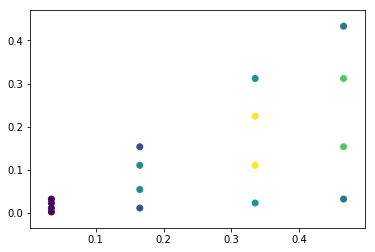

In [5]:
from modules.meta import gl_rule
import matplotlib.pyplot as plt
r = gl_rule(4,0.0,0.5,0.0,0.5,1)
#nodes   = list(map(lambda x : x[0],r.quad_rule))
#weights = list(map(lambda x : x[1],r.quad_rule))


#x = list(map(lambda x : x[0],nodes))
#y = list(map(lambda x : x[1],nodes))
x=[]
y=[]
weights=[]
#r = gl_rule(5,0.5,1.0,0.0,0.5,-1)
nodes = list(map(lambda x : x[0],r.quad_rule))

x.extend(list(map(lambda x : x[0],nodes)))
y.extend(list(map(lambda x : x[1],nodes)))
weights.extend(list(map(lambda x : x[1],r.quad_rule)))
plt.scatter(x,y,c=weights)

r.quad(lambda x,y : 2.0*x*(-1.0*x - 1.0*y + 1.0))

# Generate Yateto Tensors

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from modules.meta import * 
from modules.basis import *
from modules.output import *
from modules.genMatrices import *

import numpy as np
orders=range(8,17)
for order in orders:
    alphaNodes = getAlphaNodes(order)
    basis2D    = vandermonde_2D(order,alphaNodes)
    gllNodes   = getGLLNodes(order)
    timeBasis  = getLagrangeBasis(gllNodes)


    t_m = generate_t_m(timeBasis)
    t_m_1 = t_m[1:,:]

    t_k_t        = generate_t_k(timeBasis)
    t_k_t_10     = matrix(t_k_t[1:,:1])
    t_k_t_11     = matrix(t_k_t[1:,1:])
    t_k_t_11_inv = matrix(np.linalg.inv(t_k_t_11))
    t_k_t_11_inv_t_m_1      = t_k_t_11_inv * t_m_1
    t_k_t_11_inv_x_t_k_t_10 = t_k_t_11_inv * t_k_t_10

    t_a = generate_t_a(timeBasis)


    matrix_string="[\n"
    matrix_string+=getJSONFormat(t_k_t_11_inv_t_m_1,"t_k_t_11_inv_t_m_1")
    matrix_string += ","
    matrix_string+=getJSONFormat(t_k_t_11_inv_x_t_k_t_10,"t_k_t_11_inv_x_t_k_t_10")
    matrix_string += ","
    matrix_string+=getJSONFormat(-t_k_t_11_inv_x_t_k_t_10,"n_t_k_t_11_inv_x_t_k_t_10")
    matrix_string += ","
    matrix_string+=getJSONFormat(t_a.transpose(),"t_a")
    matrix_string += ","
    matrix_string+=getJSONFormat(-t_a.transpose(),"n_t_a")
    matrix_string += ","

    for i in range(0,8):
        matrix_string += getJSONFormat(getJacobianPad(i).transpose(),"J({})".format(i))
        matrix_string += ","
    matrix_string = matrix_string[:-1]
    matrix_string+="]"

    with open("matrices_{}.json".format(order),"w") as file:
        file.write(matrix_string)
    
    s_m = generate_s_m(basis2D)
    
    x=var("x",domain=RR)
    y=var("y",domain=RR)

    s_k_x = generate_s_k(basis2D,x)
    s_k_y = generate_s_k(basis2D,y)

    s_m_inv_s_k_x_t = s_m.inverse()*s_k_x.transpose()
    s_m_inv_s_k_y_t = s_m.inverse()*s_k_y.transpose()
    s_m_inv_s_k = np.array([[[0.0]*len(s_m_inv_s_k_x_t.columns())]*2]*len(s_m_inv_s_k_x_t.rows()))
    s_m_inv_s_k[:,0,:] = s_m_inv_s_k_x_t
    s_m_inv_s_k[:,1,:] = s_m_inv_s_k_y_t
    s_m_inv_s_k_J_inv = []

    for i in range(0,8):
        jac_inv = getJacobian(i).inverse()
        s_m_inv_s_k_J_inv_i = np.zeros(s_m_inv_s_k.shape)
        s_m_inv_s_k_J_inv_i[:,0,:] = jac_inv[0,0] * s_m_inv_s_k[:,0,:] +\
                                     jac_inv[0,1] * s_m_inv_s_k[:,1,:]
        
        s_m_inv_s_k_J_inv_i[:,1,:] = jac_inv[1,0] * s_m_inv_s_k[:,0,:] +\
                                     jac_inv[1,1] * s_m_inv_s_k[:,1,:]
    
        s_m_inv_s_k_J_inv += [s_m_inv_s_k_J_inv_i]
        
    s_b_1 = generate_s_b(basis2D,order,"l",sparse=False)
    s_b_3 = generate_s_b(basis2D,order,"r",sparse=False)
    s_b_2 = generate_s_b(basis2D,order,"m",sparse=False)
    
    s_k_x_s_b_3_s_b_2 = s_m.inverse() * (s_k_x + s_b_3 - s_b_2)
    s_k_y_s_b_1_s_b_2 = s_m.inverse() * (s_k_y + s_b_1 - s_b_2)

    s_k_s_b_J_inv = []
    s_k_s_b = np.zeros((s_k_x_s_b_3_s_b_2.nrows(),s_k_x_s_b_3_s_b_2.ncols(),2))

    s_k_s_b[:,:,0] = s_k_x_s_b_3_s_b_2
    s_k_s_b[:,:,1] = s_k_y_s_b_1_s_b_2

    for i in range(0,8):
        jac_inv = getJacobian(i).inverse()
        s_k_s_b_J_inv_i = np.zeros(s_k_s_b.shape)
        s_k_s_b_J_inv_i[:,:,0] = jac_inv[0,0] * s_k_s_b[:,:,0] +\
                                 jac_inv[0,1] * s_k_s_b[:,:,1]
        
        s_k_s_b_J_inv_i[:,:,1] = jac_inv[1,0] * s_k_s_b[:,:,0] +\
                                 jac_inv[1,1] * s_k_s_b[:,:,1]
        s_k_s_b_J_inv += [s_k_s_b_J_inv_i]
            

    tensor_string="[\n"
    for i in range(0,8):
        tensor_string+= getJSONFormatTensor(s_m_inv_s_k_J_inv[i],3,"s_m_inv_s_k_J_inv({})".format(i))
        tensor_string+=",\n"
    
    for i in range(0,8):
        tensor_string+= getJSONFormatTensor(s_k_s_b_J_inv[i],3,"s_k_s_b_J_inv({})".format(i))
        tensor_string+=",\n"
    
    Dx = np.array([[[0.0]*2]*len(basis2D)]*len(alphaNodes))

    for j in range(len(alphaNodes)):
            for i in range(len(basis2D)):
                Dx[j,i,0] = derivative(basis2D[i],x)(x=alphaNodes[j][0],y=alphaNodes[j][1])
                Dx[j,i,1] = derivative(basis2D[i],y)(x=alphaNodes[j][0],y=alphaNodes[j][1])

    tensor_string+=getJSONFormatTensor(Dx,3,"Dx")
    
    #tensor_string=tensor_string[:-2]# remove last new line and comma
    tensor_string+="\n]"

    with open("tensor_{}.json".format(order),"w") as file:
        file.write(tensor_string)

Ignoring :['']
6435/16*t^7 - 9009/16*t^5 + 3465/16*t^3 - 315/16*t


In [2]:
sage.misc.dev_tools.find_object_modules(parallel_iter)

NameError: name 'parallel_iter' is not defined